In [7]:
from ninatool.circuits.base_circuits import snail
import numpy as np
import matplotlib.pyplot as plt

In [14]:
a = 0.2 #alpha of a SNAIL

### STANDARD METHOD ###

phi = np.linspace(-3,3,10001) * 2 * np.pi #phase across the array of 3 identical JJs
phie = np.linspace(-1, 1, 101) * 2 * np.pi #external flux

PHI, PHIE = np.meshgrid(phi, phie, indexing = 'ij') #meshgrid to efficiently find minimum for each value of external flux
U = - 3 * np.cos(PHI/3) - a * np.cos(PHI - PHIE) #potential energy function
indxs = np.argmin(U, axis = 0) #indexes of minimum for each value of external flux
phimin = phi[indxs] #phases which minimize potential energy for each value of flux
c2 = 1/3 * np.cos(phimin/3) + a * np.cos(phimin - phie) #second order expansion coefficients for each value of flux

In [15]:
snail0 = snail(a = a) #defines a SNAIL in NINA
snail0.free_phi = phie #sets the phase array of the free JJ to the external flux array (to span on similar range)

Text(0.5, 1.0, 'SNAIL with $\\alpha = 0.2$')

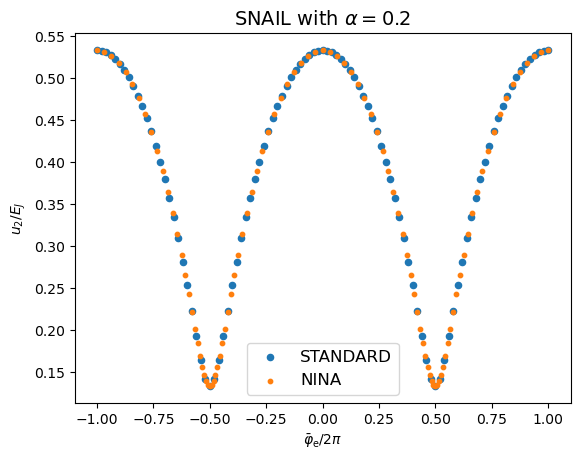

In [16]:
### COMPARISON BETWEEN STANDARD AND NINA ###
plt.scatter(phie/2/np.pi, c2, s = 20,label = 'STANDARD')
plt.scatter(snail0.flux/2/np.pi, snail0.adm[0], s = 10 , label = 'NINA')
plt.xlabel(r'$\bar{\varphi}_\mathrm{e}/2\pi$')
plt.ylabel(r'$u_2/E_J$')
plt.legend(fontsize = 12)
plt.title(r'SNAIL with $\alpha = 0.2$', fontsize = 14)

In [17]:
snail0.interpolate_results(phi_grid = phie) #performs linear interpolation on the external flux array used in STANDARD method

Text(0.5, 1.0, 'SNAIL with $\\alpha = 0.2$')

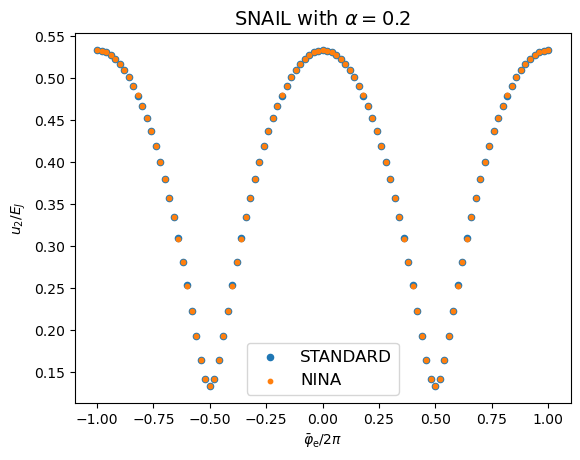

In [18]:
### COMPARISON BETWEEN STANDARD AND NINA AFTER INTERPOLATION ###
plt.scatter(phie/2/np.pi, c2, s = 20,label = 'STANDARD')
plt.scatter(snail0.flux/2/np.pi, snail0.adm[0], s = 10 , label = 'NINA')
plt.xlabel(r'$\bar{\varphi}_\mathrm{e}/2\pi$')
plt.ylabel(r'$u_2/E_J$')
plt.legend(fontsize = 12)
plt.title(r'SNAIL with $\alpha = 0.2$', fontsize = 14)